#Importação dos datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.metrics import roc_curve
%matplotlib inline

In [ ]:
df1 = pd.read_csv(r"/content/drive/MyDrive/SINO/2. Data Sets/2. 3ª Conversão - Ex One-Hot Encoding/bankFull_convertion_without_unknown.csv", sep = ",")
df1

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,58,0,2143,1,0,5,8,261,1,-1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,44,0,29,1,0,5,8,151,1,-1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,33,0,2,1,1,5,8,76,1,-1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,47,0,1506,1,0,5,8,92,1,-1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,33,0,1,0,0,5,8,198,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45039,51,0,825,0,0,17,9,977,3,-1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
45040,71,0,1729,0,0,17,9,456,2,-1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
45041,72,0,5715,0,0,17,9,1127,5,184,3,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
45042,57,0,668,0,0,17,9,508,4,-1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


#Separação dos dados em treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

X = df1.drop(['y','duration','balance'] , axis=1)
y = df1["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [ ]:
print(X_train)
print(y_train)


       age  default  ...  poutcome_other  poutcome_success
2942    44        0  ...               0                 0
30548   66        0  ...               0                 0
345     53        0  ...               0                 0
41274   26        0  ...               0                 0
31196   29        0  ...               0                 0
...    ...      ...  ...             ...               ...
11284   60        0  ...               0                 0
44732   36        0  ...               0                 0
38158   32        0  ...               1                 0
860     53        0  ...               0                 0
15795   57        0  ...               0                 0

[30179 rows x 31 columns]
2942     0
30548    1
345      0
41274    0
31196    1
        ..
11284    0
44732    0
38158    0
860      0
15795    0
Name: y, Length: 30179, dtype: int64


#Classificação

##Técnicas [8]

###1 - Linear Model: 

####1.1 - Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
p = lm.predict(X_test)
p2 = lm.predict_proba(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_score_0 = roc_auc_score(y_test, p2[:,1])
roc_score_0

0.720005891551319

In [ ]:
p2=p2[:,1]
falsep_0, truep_0, _ = roc_curve(y_test, p2)



In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, p))
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, p))

[[13023    86]
 [ 1572   184]]
0.8884628321560714


####1.2 - SGDClassifier

In [ ]:
## Always scale the input. The most convenient way is to use a pipeline.
>>> from sklearn.linear_model import SGDClassifier
>>> from sklearn.preprocessing import StandardScaler
>>> from sklearn.pipeline import make_pipeline

clf = make_pipeline(StandardScaler(),SGDClassifier(max_iter=1000, tol=1e-3,loss="log"))

clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdclassifier',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='log',
                               max_iter=1000, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=None,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)

In [ ]:
p = clf.predict(X_test)
p2 = clf.predict_proba(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_score_2 = roc_auc_score(y_test, p2[:,1])
roc_score_2

0.714913535554613

In [ ]:
p2=p2[:,1]
falsep_2, truep_2, _ = roc_curve(y_test, p2)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, p))
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, p))

[[13068    41]
 [ 1671    85]]
0.8848301379078372


###2 - Decision Tree Classifier

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [ ]:
p = clf.predict(X_test)
p2 = clf.predict_proba(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_score_1 = roc_auc_score(y_test, p2[:,1])
roc_score_1

0.6093215966842582

In [ ]:
p2=p2[:,1]
falsep_1, truep_1, _ = roc_curve(y_test, p2)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, p))
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, p))

[[11827  1282]
 [ 1201   555]]
0.8329633366969391


###3 - Linear and Quadratic Discriminant Analysis: 

####3.1 - Linear Discriminant Analysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
p = clf.predict(X_test)
p2 = clf.predict_proba(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_score_3 = roc_auc_score(y_test, p2[:,1])
roc_score_3

0.7346479300680417

In [ ]:
p2=p2[:,1]
falsep_3, truep_3, _ = roc_curve(y_test, p2)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, p))
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, p))

[[12926   183]
 [ 1439   317]]
0.8908846283215607


####3.2 - Quadratic Discriminant Analysis

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [ ]:
p = clf.predict(X_test)
p2 = clf.predict_proba(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_score_4 = roc_auc_score(y_test, p2[:,1])
roc_score_4

0.7020693498406823

In [ ]:
p2=p2[:,1]
falsep_4, truep_4, _ = roc_curve(y_test, p2)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, p))
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, p))

[[11863  1246]
 [ 1116   640]]
0.8411032626976118


###4 - Naive Bayes:

####4.1 - Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
p = clf.predict(X_test)
p2 = clf.predict_proba(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_score_5 = roc_auc_score(y_test, p2[:,1])
roc_score_5

0.7098018697617019

In [ ]:
p2=p2[:,1]
falsep_5, truep_5, _ = roc_curve(y_test, p2)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, p))
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, p))


[[11473  1636]
 [ 1062   694]]
0.8184998318197108


####4.2 - Bernoulli Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [ ]:
p = clf.predict(X_test)
p2 = clf.predict_proba(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_score_6 = roc_auc_score(y_test, p2[:,1])
roc_score_6

0.7130200026030213

In [ ]:
p2=p2[:,1]
falsep_6, truep_6, _ = roc_curve(y_test, p2)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, p))
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, p))

[[12384   725]
 [ 1263   493]]
0.8662630339724184


###5 - Neural network models (supervised): MLPClassifier

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
clf = MLPClassifier(random_state=1, max_iter=1000)
clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
pMLP = clf.predict(X_test)
p2 = clf.predict_proba(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_score_7 = roc_auc_score(y_test, p2[:,1])
roc_score_7

0.7537537244665414

In [ ]:
p2=p2[:,1]
falsep_7, truep_7, _ = roc_curve(y_test, p2)

##Avaliação das Diversas Técnicas

In [ ]:
#### ns stands for no skill
ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

Logistic Regression: ROC AUC=0.720
SGDClassifier: ROC AUC=0.715
Arvore_decisao: ROC AUC=0.609
LinearDiscriminantAnalysis: ROC AUC=0.735
QuadraticDiscriminantAnalysis: ROC AUC=0.702
Naive Bayes: ROC AUC=0.710
BernoulliNB: ROC AUC=0.713
Neural network MLPClassifier: ROC AUC=0.754


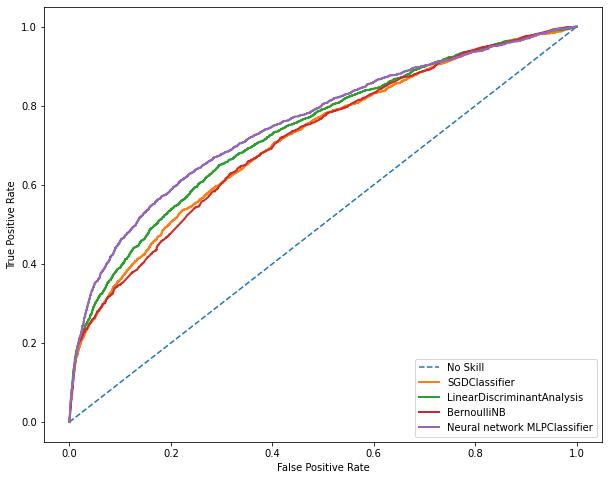

In [ ]:
print('Logistic Regression: ROC AUC=%.3f' % (roc_score_0))
print('SGDClassifier: ROC AUC=%.3f' % (roc_score_2))
print('Arvore_decisao: ROC AUC=%.3f' % (roc_score_1))
print('LinearDiscriminantAnalysis: ROC AUC=%.3f' % (roc_score_3))
print('QuadraticDiscriminantAnalysis: ROC AUC=%.3f' % (roc_score_4))
print('Naive Bayes: ROC AUC=%.3f' % (roc_score_5))
print('BernoulliNB: ROC AUC=%.3f' % (roc_score_6))
print('Neural network MLPClassifier: ROC AUC=%.3f' % (roc_score_7))

#### calculate roc curves
plt.figure(figsize=(10, 8))

#### plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
#plt.plot(falsep_0, truep_0, marker=',', label='Logistic Regression',linewidth=2)
plt.plot(falsep_2, truep_2, marker=',', label='SGDClassifier',linewidth=2)
#plt.plot(falsep_1, truep_1, marker=',', label='Arvore_decisão',linewidth=2)
plt.plot(falsep_3, truep_3, marker=',', label='LinearDiscriminantAnalysis',linewidth=2)
#plt.plot(falsep_4, truep_4, marker=',', label='QuadraticDiscriminantAnalysis',linewidth=2)
#plt.plot(falsep_5, truep_5, marker=',', label='Naive Bayes',linewidth=2)
plt.plot(falsep_6, truep_6, marker=',', label='BernoulliNB',linewidth=2)
plt.plot(falsep_7, truep_7, marker=',', label='Neural network MLPClassifier',linewidth=2)

#### axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#### show the legend
plt.legend(loc="lower right")

#### show the plot
plt.show()

## Matriz de confusão (MLPClassifier)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pMLP))


[[12965   144]
 [ 1485   271]]


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pMLP))

0.8904137235116044


## Relatório de Classificação do Melhor Modelo (MLPClassifier)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pMLP))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     13109
           1       0.65      0.15      0.25      1756

    accuracy                           0.89     14865
   macro avg       0.78      0.57      0.60     14865
weighted avg       0.87      0.89      0.86     14865



#Regressão

In [ ]:
from sklearn.model_selection import train_test_split

X = df1.drop(['y','duration'] , axis=1)
y = df1["duration"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

## Técnicas [7]

####1 - Linear Model:

#####1.1 - Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

clf = Ridge()
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)

print('Explained Variance Score: %.4f' % explained_variance_score(y_test, predictions))
print('Max Error:%.3f' % max_error(y_test, predictions))
print('MAE: %.3f' % mean_absolute_error(y_test, predictions))
print('MSE: %.3f' % mean_squared_error(y_test, predictions))
print('Median Absolute Error: %.3f' % median_absolute_error(y_test, predictions))
print('R2: %.4f' % r2_score(y_test, predictions))

Explained Variance Score: 0.0113
Max Error:1987.528
MAE: 166.511
MSE: 61259.260
Median Absolute Error: 130.147
R2: 0.0111


#####1.2 - Linear Regression

In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
predictions2 = reg.predict(X_test)

print('Explained Variance Score: %.4f' % explained_variance_score(y_test, predictions2))
print('Max Error:%.3f' % max_error(y_test, predictions2))
print('MAE: %.3f' % mean_absolute_error(y_test, predictions2))
print('MSE: %.3f' % mean_squared_error(y_test, predictions2))
print('Median Absolute Error: %.3f' % median_absolute_error(y_test, predictions2))
print('R2: %.4f' % r2_score(y_test, predictions2))

Explained Variance Score: 0.0112
Max Error:1987.542
MAE: 166.512
MSE: 61260.125
Median Absolute Error: 130.144
R2: 0.0111


#####1.3 - Bayesian Ridge

In [ ]:
from sklearn import linear_model
clf = linear_model.BayesianRidge()
clf.fit(X_train,y_train)
predictions3 = clf.predict(X_test)

print('Explained Variance Score: %.4f' % explained_variance_score(y_test, predictions3))
print('Max Error:%.3f' % max_error(y_test, predictions3))
print('MAE: %.3f' % mean_absolute_error(y_test, predictions3))
print('MSE: %.3f' % mean_squared_error(y_test, predictions3))
print('Median Absolute Error: %.3f' % median_absolute_error(y_test, predictions3))
print('R2: %.4f' % r2_score(y_test, predictions3))

Explained Variance Score: 0.0116
Max Error:1979.493
MAE: 166.478
MSE: 61235.195
Median Absolute Error: 130.531
R2: 0.0115


#####1.4 - Lasso

In [ ]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, y_train)
predictions5  = clf.predict(X_test)
 

print('Explained Variance Score: %.4f' % explained_variance_score(y_test, predictions5))
print('Max Error:%.3f' % max_error(y_test, predictions5))
print('MAE: %.3f' % mean_absolute_error(y_test, predictions5))
print('MSE: %.3f' % mean_squared_error(y_test, predictions5))
print('Median Absolute Error: %.3f' % median_absolute_error(y_test, predictions5))
print('R2: %.4f' % r2_score(y_test, predictions5))

Explained Variance Score: 0.0115
Max Error:1981.846
MAE: 166.488
MSE: 61246.388
Median Absolute Error: 130.452
R2: 0.0114


#####1.5 - SGDRegressor

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

reg = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X_train, y_train)
predictions6 = reg.predict(X_test)

print('Explained Variance Score: %.4f' % explained_variance_score(y_test, predictions6))
print('Max Error:%.3f' % max_error(y_test, predictions6))
print('MAE: %.3f' % mean_absolute_error(y_test, predictions6))
print('MSE: %.3f' % mean_squared_error(y_test, predictions6))
print('Median Absolute Error: %.3f' % median_absolute_error(y_test, predictions6))
print('R2: %.4f' % r2_score(y_test, predictions6))

Explained Variance Score: 0.0096
Max Error:1993.693
MAE: 166.200
MSE: 61370.625
Median Absolute Error: 129.005
R2: 0.0093


###2 - Neural Network: MLP Regressor

In [ ]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, max_iter=75)
regr.fit(X_train, y_train)
predictions4 = regr.predict(X_test)


print('Explained Variance Score: %.4f' % explained_variance_score(y_test, predictions4))
print('Max Error:%.3f' % max_error(y_test, predictions4))
print('MAE: %.3f' % mean_absolute_error(y_test, predictions4))
print('MSE: %.3f' % mean_squared_error(y_test, predictions4))
print('Median Absolute Error: %.3f' % median_absolute_error(y_test, predictions4))
print('R2: %.4f' % r2_score(y_test, predictions4))

Explained Variance Score: -0.0052
Max Error:1917.636
MAE: 171.947
MSE: 62342.748
Median Absolute Error: 136.798
R2: -0.0063


###3 - DecisionTree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)
predictions7 = regressor.predict(X_test)

print('Explained Variance Score: %.4f' % explained_variance_score(y_test, predictions7))
print('Max Error:%.3f' % max_error(y_test, predictions7))
print('MAE: %.3f' % mean_absolute_error(y_test, predictions7))
print('MSE: %.3f' % mean_squared_error(y_test, predictions7))
print('Median Absolute Error: %.3f' % median_absolute_error(y_test, predictions7))
print('R2: %.4f' % r2_score(y_test, predictions7))

Explained Variance Score: -1.1340
Max Error:2068.000
MAE: 238.382
MSE: 132582.153
Median Absolute Error: 143.000
R2: -1.1402


##Avaliação modelos





In [ ]:
models = []
models.append(('Ridge', Ridge()))
models.append(('LR', linear_model.LinearRegression()))
models.append(('BR', linear_model.BayesianRidge()))
models.append(('MLPR',  MLPRegressor(random_state=1, max_iter=500)))
models.append(('Lasso', linear_model.Lasso(alpha=0.1)))
models.append(('SGDR', make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))))
models.append(('DTR', DecisionTreeRegressor(random_state=0)))

In [ ]:
results = []
names = []

print("Modelo: Média | Std \n")
for name, model in models:
    kfold = KFold(n_splits=10)
    cvs = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
    results.append(cvs)
    names.append(name)
    resultado = "%s: %f (%f)" % (name, cvs.mean(), cvs.std())
    print(resultado)

Modelo: Média | Std 

Ridge: 0.014168 (0.003597)
LR: 0.014166 (0.003599)
BR: 0.014153 (0.003175)
MLPR: 0.000844 (0.007156)
Lasso: 0.014166 (0.003437)
SGDR: 0.009722 (0.004365)
DTR: -1.133003 (0.083927)


In [ ]:
print('Legenda:')
print('  .','Técnica Utilizada:','Valores de R2 (Std)')

Legenda:
  . Técnica Utilizada: Valores de R2 (Std)


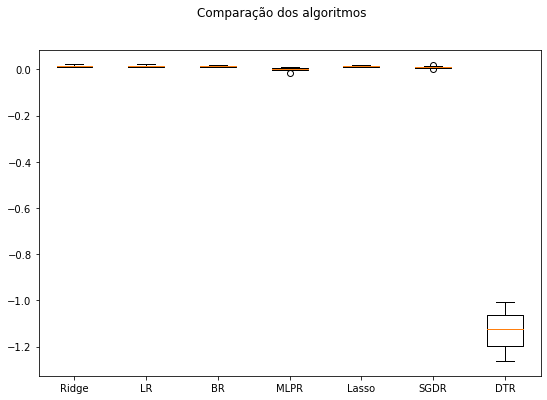

In [ ]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
ax.plot(figsize=(3,3));
plt.boxplot(results[0:7])

fig.suptitle('Comparação dos algoritmos')
ax.set_xticklabels(names)
plt.show()


Nota: O modelo DTR tem um valor muito negativo e, como tal, foi retirado para melhor leitura do gráfico.

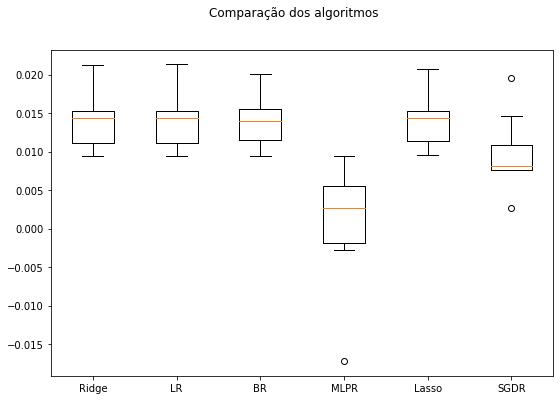

In [ ]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
ax.plot(figsize=(3,3));
plt.boxplot(results[0:6])

fig.suptitle('Comparação dos algoritmos')
ax.set_xticklabels(names)
plt.show()

O modelo Ridler é o modelo com melhores resultados em termos de R2.